In [1]:
from IPython.display import display, Image

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) [0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


C:\Users\ahw48\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

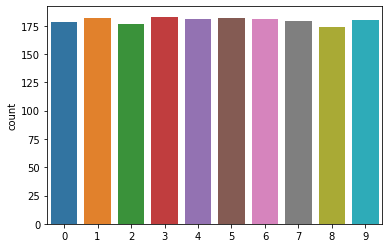

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.keys(), digits.target)
print(np.unique(digits.target))
sns.countplot(digits.target)

In [5]:
X = digits.data             # 입력  
y = digits.target == 9      # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\ahw48\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

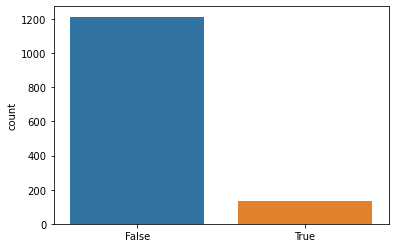

In [6]:
sns.countplot(y_train)

C:\Users\ahw48\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

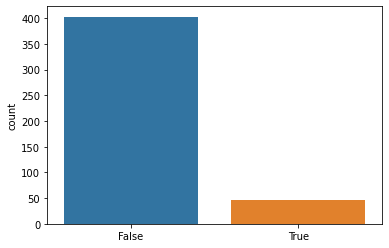

In [7]:
sns.countplot(y_test)

In [8]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_model.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_model.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [10]:
dummy = DummyClassifier(strategy='stratified', 
                        random_state=0).fit(X_train, y_train)
pred = dummy.predict(X_test)
print('테스트 점수 : {:.2f}'.format(dummy.score(X_test, y_test)))

테스트 점수 : 0.80


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred = tree.predict(X_test)
print('테스트 점수 : {:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수 : 0.92


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = model.predict(X_test)
print("logreg 점수: {:.2f}".format(model.score(X_test, y_test)))

logreg 점수: 0.98


C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


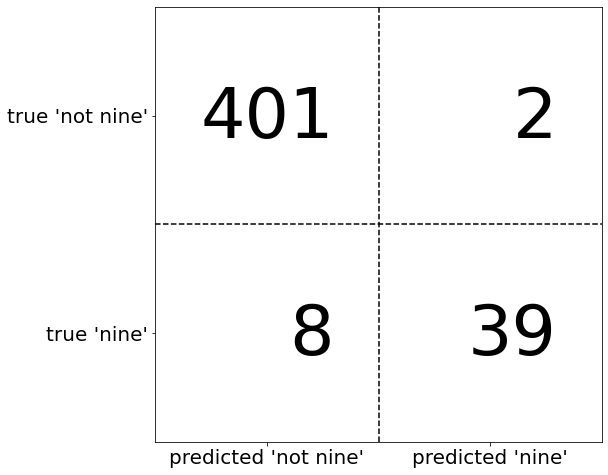

In [14]:
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

In [15]:
(401+39)/(401+39+8+2)

0.9777777777777777

In [16]:
### 정밀도(precision), 민감도(재현율-recall, Tprate), 특이도, Fprate

### 정밀도
 * 예측을 y한 것중에 맞힌것.

### 민감도
 * 실제 y값 중에 맞힌것.
    
### 특이도
 * 실제 n값 중에 맞힌것.
    
### Fprate
 * 실제 n값 중에 틀린것

### 정밀도
 * 예측을 y한 것중에 맞힌것.

In [18]:
39/(2+39)

0.9512195121951219

### 민감도
 * 실제 y값 중에 맞힌것.

In [19]:
39/(8+39)

0.8297872340425532

### 특이도
 * 실제 n값 중에 맞힌것.

In [20]:
401/(401+2)

0.9950372208436724

### Fprate
 * 실제 n값 중에 틀린것

In [21]:
2/(401+2)

0.004962779156327543

In [22]:
from sklearn.metrics import confusion_matrix

In [25]:
c = confusion_matrix(y_test, pred)
print('오차행렬 :')
print(c)

오차행렬 :
[[402   1]
 [  6  41]]


In [27]:
dummy1 = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred1 = dummy1.predict(X_test)

dummy2 = DummyClassifier(strategy='stratified', 
                        random_state=0).fit(X_train, y_train)
pred2 = dummy2.predict(X_test)

tree = DecisionTreeClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
pred3 = tree.predict(X_test)

log_model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred4 = log_model.predict(X_test)

C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred1))

print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred2))

print("\n결정 트리:")
print(confusion_matrix(y_test, pred3))

print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred4))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[357  46]
 [ 43   4]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


### 결정트리 정확도
 * (TN+TP)/(TN+FP+FN+TP)

In [37]:
(390+23)/(390+13+24+23)

0.9177777777777778

### 로지스틱 회귀 정확도

In [30]:
(402+41)/(402+1+6+41)

0.9844444444444445

### 빈도기반

In [35]:
print('정확도 : ', 430/450)
print('정밀도 : ', 0)
print('민감도 : ', 0/47)
print('특이도 : ', 403/403)
print('Fprate : ', 0/403)

정확도 :  0.9555555555555556
정밀도 :  0
민감도 :  0.0
특이도 :  1.0
Fprate :  0.0


### 로지스틱 회귀

In [36]:
print('정확도 : ', (402+41)/(402+1+6+41))
print('정밀도 : ', 41/(1+41))
print('민감도 : ', 41/(6+41))
print('특이도 : ', 402/(402+1))
print('Fprate : ', 1/(402+1))

정확도 :  0.9844444444444445
정밀도 :  0.9761904761904762
민감도 :  0.8723404255319149
특이도 :  0.9975186104218362
Fprate :  0.0024813895781637717


### ROC
 * x : 1 - 특이도 => Fprate
 * y : 민감도
 * AUC

In [38]:
from sklearn.metrics import f1_score

# 빈도기반 모델 f1-score
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred1)))

# Dummy분류 f1-score
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred2)))

# 의사결정트리
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred3)))

# 로지스틱 
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred4)))

무작위 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.08
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [39]:
from sklearn.metrics import classification_report

In [41]:
# 더미모델
print(classification_report(y_test, pred1,
                     target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
        is 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [42]:
# 의사결정트리
print(classification_report(y_test, pred3,
                     target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.94      0.97      0.95       403
        is 9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [43]:
# 더미모델2
print(classification_report(y_test, pred2,
                     target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.89      0.89      0.89       403
        is 9       0.08      0.09      0.08        47

    accuracy                           0.80       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.80      0.80       450



In [44]:
# 로지스틱회귀
print(classification_report(y_test, pred4,
                     target_names=['not 9', 'is 9']))

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       403
        is 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [46]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50),
                  centers=2,
                  cluster_std=[7.0, 2],
                  random_state=22)

C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [47]:
X.shape, y.shape

((450, 2), (450,))

In [48]:
X[0:3]

array([[-11.31233174,  -1.2091853 ],
       [  3.633774  ,   2.58952562],
       [ -2.03502489,   3.38227669]])

In [49]:
y[0:35]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [50]:
np.unique(y)

array([0, 1])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

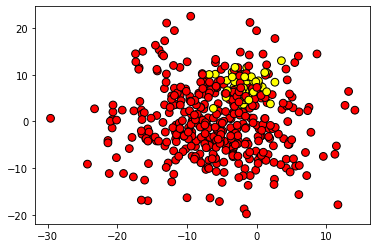

In [52]:
plt.scatter(X[:,0], X[:,1],
            c=y,
            cmap=plt.cm.autumn, s=60, edgecolors='k')

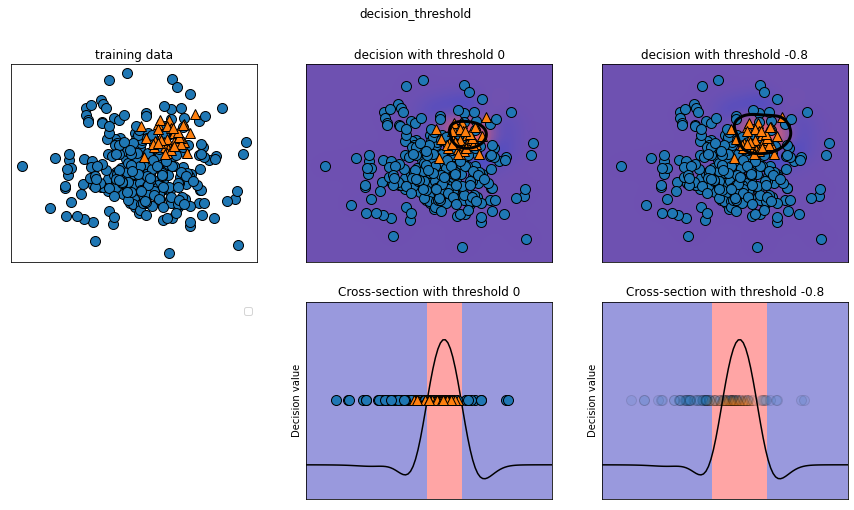

In [53]:
mglearn.plots.plot_decision_threshold()

In [54]:
svc = SVC(gamma=.05).fit(X_train, y_train)
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [55]:
decision_0 = svc.decision_function(X_test) > 0
decision_0.sum()

17

In [56]:
decision_8 = svc.decision_function(X_test) > -0.8
decision_8.sum()

28